# Rework of Lab 7

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#This-Lab:" data-toc-modified-id="This-Lab:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>This Lab:</a></span></li><li><span><a href="#Disk-density-plot:" data-toc-modified-id="Disk-density-plot:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Disk density plot:</a></span></li><li><span><a href="#Edge-on-plot" data-toc-modified-id="Edge-on-plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Edge-on plot</a></span></li><li><span><a href="#Face-on-plot" data-toc-modified-id="Face-on-plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Face-on plot</a></span></li><li><span><a href="#Velocities" data-toc-modified-id="Velocities-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Velocities</a></span></li></ul></div>

In [1]:
# import modules
import numpy as np
from numpy.linalg import norm
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# my modules
from galaxy.galaxy import Galaxy
from galaxy.centerofmass import CenterOfMass
from galaxy.massprofile import MassProfile
from galaxy.utilities import density_contour
from galaxy.timecourse import TimeCourse

## This Lab:

A) Using Contour plots to identify substructure within the stellar disk of M31.

B) Rotating the disk so that we are seeing it edge on

C) Create plots to examine the kinematics of the disk

In [2]:
gname = 'M31'
snap = 0

gal = Galaxy(gname, snap, usesql=True, ptype=2)
com = CenterOfMass(gal)

In [3]:
tc = TimeCourse(usesql=True)
com_xyz, com_vxyz = tc.get_one_com(gname, snap)

In [4]:
gal_xyzD, gal_vxyzD = com.center_com(com_xyz, com_vxyz)

In [5]:
gal_xyzD.shape, gal_vxyzD.shape

((3, 600000), (3, 600000))

In [6]:
# # Determine positions of disk particles relative to COM 
# gal_xyz = np.array([gal.data[xi] for xi in ('x','y','z')]) - com_xyz

# # total magnitude
# rtot = norm(gal_xyz, axis=0)

# # Determine velocities of disk particles relatiev to COM motion
# gal_vxyz = np.array([gal.data[vxi] for vxi in ('vx','vy','vz')]) - com_vxyz

# # total velocity 
# vtot = norm(gal_vxyz, axis=0)

## Disk density plot:

Create plot of M31's disk density, using 2D Histograms 

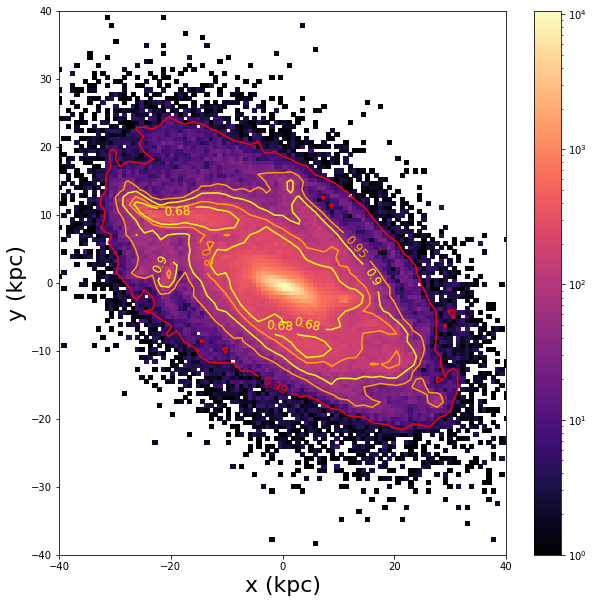

In [7]:
# 1) Make plots 

xD, yD = gal_xyzD[0], gal_xyzD[1]

# M31 Disk Density 
fig, ax= plt.subplots(figsize=(10, 10))

# plot the particle density for M31 using a 2D historgram
# can modify bin number to make the plot smoother
plt.hist2d(xD, yD, bins=150, norm=LogNorm(), cmap='magma')
plt.colorbar()

# Add axis labels
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('y (kpc)', fontsize=22)

#set axis limits
plt.ylim(-40,40)
plt.xlim(-40,40)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# make the contour plot
# x pos, y pos, contour res, contour res, axis, colors for contours.
level_vals = [0.68, 0.8, 0.9, 0.95, 0.99]
colors = ['red','orange', 'yellow', 'orange', 'yellow']
density_contour(xD, yD, 80, 80, level_vals, ax=ax, colors=colors);


# Save to a file
#plt.savefig('XY_Disk_M31.pdf', rasterized=True, dpi=350)

In this projection, if the spiral arms are trailing it looks like M31 is rotating CW.
But we don't know the inclination of the galaxy! This can change the interpretation.

## Edge-on plot

Rotate the M31 disk and plot it edge on and face on.

What is the sense of rotation of M31 ? 

In [8]:
# determine the rotated velocity vectors
rn, vn = com.rotate_frame(com_p=com_xyz, com_v=com_vxyz)

In [9]:
rn.shape, vn.shape

((3, 600000), (3, 600000))

In [10]:
L, pos, v = com.angular_momentum(com_p=com_xyz, com_v=com_vxyz)
L /= norm(L)
L

array([-0.41449043, -0.76728666, -0.4893555 ], dtype=float32)

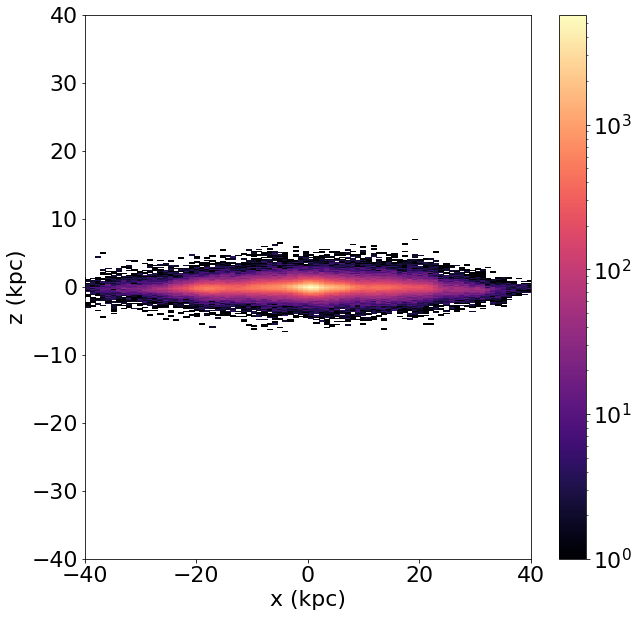

In [11]:
# Rotated M31 Disk - EDGE ON

# M31 Disk Density 
fig, ax= plt.subplots(figsize=(10, 10))

# plot the particle density for M31 
# can modify bin number (bin =100 smoothest)
plt.hist2d(rn[0,:], rn[2,:], bins=150, norm=LogNorm(), cmap='magma')
plt.colorbar()

# Add axis labels
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('z (kpc)', fontsize=22)

#set axis limits
plt.ylim(-40,40)
plt.xlim(-40,40)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# make the contour plot
# x pos, y pos, contour res, contour res, axis, colors for contours.
#density_contour(rn[:,0], rn[:,2], 80, 80, ax=ax, colors=['red','orange', 'yellow', 'orange', 'yellow'])


## Face-on plot

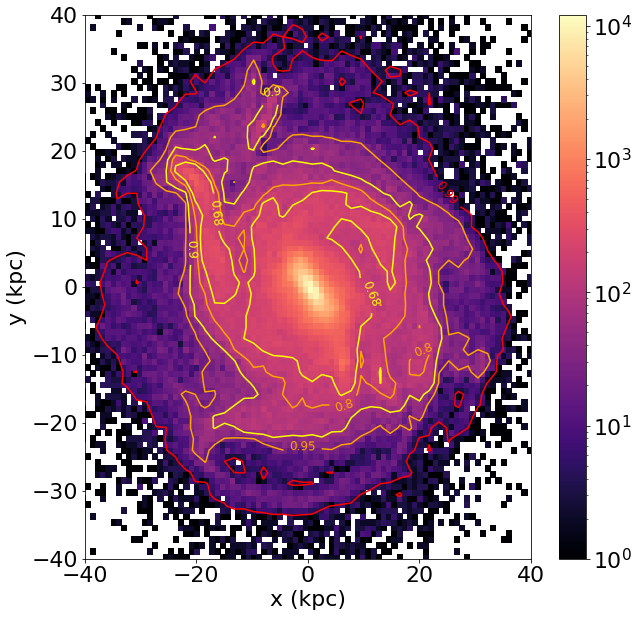

In [12]:
# Rotated M31 Disk - FACE ON

# M31 Disk Density 
fig, ax= plt.subplots(figsize=(10, 10))

# plot the particle density for M31 
# can modify bin number (bin =100 smoothest)
plt.hist2d(rn[0,:], rn[1,:], bins=150, norm=LogNorm(), cmap='magma')
plt.colorbar()

# Add axis labels
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('y (kpc)', fontsize=22)

#set axis limits
plt.ylim(-40,40)
plt.xlim(-40,40)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# make the contour plot
# x pos, y pos, contour res, contour res, axis, colors for contours.
level_vals = [0.68, 0.8, 0.9, 0.95, 0.99]
colors = ['red','orange', 'yellow', 'orange', 'yellow']
density_contour(rn[0,:], rn[1,:], 80, 80, level_vals, ax=ax, colors=colors);

If the arms are trailing, then the disk should be rotating towards  NEGATIVE Y  along NEGATIVE X  (CCW)

## Velocities

a) Create a scatter plot of the edge on disk particles, weighted by velocity.

b) Create a phase diagram for the edge on disk (Position vs. Velocity) using a 2D Histogram.

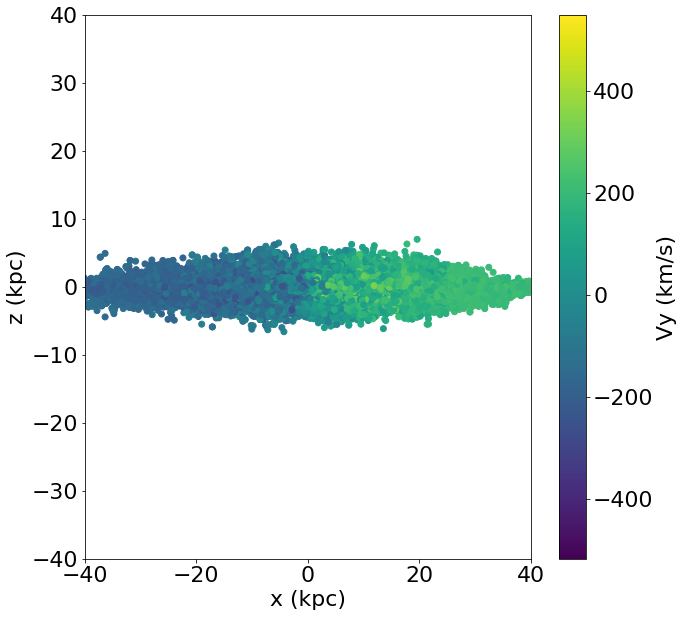

In [13]:
# Plot velocity weighted EDGE ON DISK

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot position of disk particles color coded by velocity along the 3rd axis
plt.scatter(rn[0,:],rn[2,:],c=vn[1,:])

#colorbar
cbar = plt.colorbar()
cbar.set_label(r'Vy (km/s)', size=22)

# Add axis labels
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('z (kpc)', fontsize=22)


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

#set axis limits
plt.ylim(-40,40)
plt.xlim(-40,40);

# Save file
#plt.savefig('XZ_VelRotate_M31.pdf', rasterized=True, dpi=350)

Indeed, along NEGATIVE X the disk is rotating into the page, which is in the direction of NEGATIVE Y. So M31 is rotating Counter Clock Wise

In [14]:
# a)  Create a mass profile object for M31
M31 =  Galaxy(gname, snap, usesql=True)
M31_mp = MassProfile(M31, com_p=com_xyz)

In [15]:
R = np.arange(0.01,40,0.1) * u.kpc
Vcirc = M31_mp.circular_velocity_total(R)

(3, 945000) (945000,)


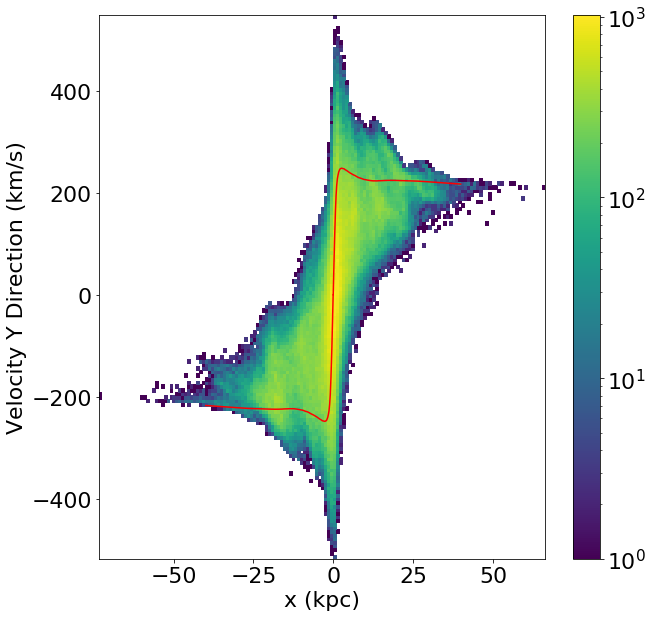

In [22]:
# Make a phase diagram
# MW Disk Velocity Field edge on.

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# looking at MW edge on along x axis, vy is line of sight velocity

plt.hist2d(rn[0,:], vn[1,:], bins=150, norm=LogNorm())
plt.colorbar()

# Add the circular velocity
plt.plot(R, Vcirc, color="red")
plt.plot(-R, -Vcirc, color="red")

# Add axis labels
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('Velocity Y Direction (km/s)', fontsize=22)

#set axis limits
#plt.ylim(0,200)
#plt.xlim(-30,30)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size;


# Save to a file
plt.savefig('M31_Vy_X.png', rasterized=True, dpi=350);

In [17]:
plt.savefig('M31_Vy_X.pdf', rasterized=True, dpi=350)

<Figure size 432x288 with 0 Axes>

In [18]:
?plt.savefig

In [19]:
plt.show()